In [1]:
import pandas as pd
import pickle
training_set = pd.read_csv("log_mini.csv")
training_set.head(n = 10)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,20,t_c815228b-3212-4f9e-9d4f-9cb19b248184,False,False,True,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,fwdbtn
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,20,t_e23c19f5-4c32-4557-aa44-81372c2e3705,True,True,True,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,20,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,True,True,True,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,20,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,False,True,True,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,20,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,True,True,True,False,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn


In [2]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

In [3]:
training_set.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                               bool
skip_2                               bool
skip_3                               bool
not_skipped                          bool
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle        bool
hour_of_day                         int64
date                               object
premium                              bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [4]:
training_set.hist_user_behavior_reason_start = training_set.hist_user_behavior_reason_start.astype('category')
training_set.hist_user_behavior_reason_end = training_set.hist_user_behavior_reason_end.astype('category')
training_set.context_type = training_set.context_type.astype('category')
training_set.date = training_set.date.apply(pd.to_datetime)

In [5]:
training_set.dtypes

session_id                                 object
session_position                            int64
session_length                              int64
track_id_clean                             object
skip_1                                       bool
skip_2                                       bool
skip_3                                       bool
not_skipped                                  bool
context_switch                              int64
no_pause_before_play                        int64
short_pause_before_play                     int64
long_pause_before_play                      int64
hist_user_behavior_n_seekfwd                int64
hist_user_behavior_n_seekback               int64
hist_user_behavior_is_shuffle                bool
hour_of_day                                 int64
date                               datetime64[ns]
premium                                      bool
context_type                             category
hist_user_behavior_reason_start          category


In [6]:
# Load in the track features
track_data = pd.read_csv("tf_mini.csv")
track_data.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [7]:
track_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [8]:
track_data.dtypes

track_id                   object
duration                  float64
release_year                int64
us_popularity_estimate    float64
acousticness              float64
beat_strength             float64
bounciness                float64
danceability              float64
dyn_range_mean            float64
energy                    float64
flatness                  float64
instrumentalness          float64
key                         int64
liveness                  float64
loudness                  float64
mechanism                 float64
mode                       object
organism                  float64
speechiness               float64
tempo                     float64
time_signature              int64
valence                   float64
acoustic_vector_0         float64
acoustic_vector_1         float64
acoustic_vector_2         float64
acoustic_vector_3         float64
acoustic_vector_4         float64
acoustic_vector_5         float64
acoustic_vector_6         float64
acoustic_vecto

In [9]:
track_data.to_pickle("track_data.pkl")

In [10]:
# Using skip_2 as the ground truth
training_set['skipped'] = (training_set.skip_2 | training_set.skip_1).astype('int32')
training_set = training_set.drop(columns=['skip_1','skip_2','skip_3','not_skipped'])
training_set.head( n = 20)

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0
5,0_00006f66-33e5-4de7-a324-2d18e439fc1e,6,20,t_c815228b-3212-4f9e-9d4f-9cb19b248184,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,fwdbtn,0
6,0_00006f66-33e5-4de7-a324-2d18e439fc1e,7,20,t_e23c19f5-4c32-4557-aa44-81372c2e3705,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,1
7,0_00006f66-33e5-4de7-a324-2d18e439fc1e,8,20,t_0be6eced-f56f-48bd-8086-f2e0b760fdee,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,1
8,0_00006f66-33e5-4de7-a324-2d18e439fc1e,9,20,t_f3ecbd3b-9e8e-4557-b8e0-39cfcd7e65dd,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,1
9,0_00006f66-33e5-4de7-a324-2d18e439fc1e,10,20,t_2af4dfa0-7df3-4b7e-b7ab-353ba48237f9,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,fwdbtn,fwdbtn,1


In [11]:
import pickle
track_data = pd.read_pickle("track_data.pkl")
#track_data.iloc[:,1:] = track_data.iloc[:,1:].astype("float32")
track_data.head()


,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [12]:
track_data['mode'] = (track_data['mode'] == 'major').astype('int32')
track_data.iloc[:,1:] = track_data.iloc[:,1:].astype("float32")
track_data.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950.0,99.975418,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0.0,0.132124,-11.238,0.386100,1.0,0.541606,0.079985,166.287003,4.0,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950.0,99.969429,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0.0,0.163281,-13.706,0.125000,1.0,0.895874,0.083877,95.261002,3.0,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951.0,99.602547,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0.0,0.090115,-10.522,0.200669,0.0,0.806136,0.038777,105.185997,4.0,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951.0,99.665016,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0.0,0.360924,-11.032,0.427152,1.0,0.492772,0.038337,119.441002,4.0,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951.0,99.991760,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0.0,0.189162,-6.836,0.281250,1.0,0.723808,0.032043,95.261002,4.0,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [13]:
session_data = (
    training_set[['session_id','session_position','track_id_clean', 'skipped']]
    .merge(
        track_data,
        how='left',
        left_on=['track_id_clean'],
        right_on=['track_id']
    ).drop(columns='track_id_clean')
)
session_data.head()

,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1.0,0.678553,-6.577,0.546784,1.0,0.320668,0.069717,134.024994,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7.0,0.104322,-5.319,0.824766,0.0,0.131391,0.061158,130.037994,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10.0,0.135776,-5.843,0.774327,1.0,0.296923,0.045354,145.028000,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1.0,0.103722,-7.756,0.630996,1.0,0.603271,0.229936,111.982002,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,210.545258,2018.0,99.998497,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8.0,0.120842,-4.919,0.759465,1.0,0.170148,0.240980,147.031006,4.0,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


In [14]:
full_session_data = pd.concat((
    session_data,
    session_data.drop(columns=['track_id'])\
        .groupby('session_id')\
        .shift(1)\
        .rename(columns={c:f"previous_{c}" for c in session_data.columns})
), axis=1)
full_session_data.head()

,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,previous_session_position,previous_skipped,previous_duration,previous_release_year,previous_us_popularity_estimate,previous_acousticness,previous_beat_strength,previous_bounciness,previous_danceability,previous_dyn_range_mean,previous_energy,previous_flatness,previous_instrumentalness,previous_key,previous_liveness,previous_loudness,previous_mechanism,previous_mode,previous_organism,previous_speechiness,previous_tempo,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1.0,0.678553,-6.577,0.546784,1.0,0.320668,0.069717,134.024994,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7.0,0.104322,-5.319,0.824766,0.0,0.131391,0.061158,130.037994,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,1.0,0.0,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1.0,0.678553,-6.577,0.546784,1.0,0.320668,0.069717,134.024994,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10.0,0.135776,-5.843,0.774327,1.0,0.296923,0.045354,145.028000,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,2.0,0.0,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7.0,0.104322,-5.319,0.824766,0.0,0.131391,0.061158,130.037994,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1.0,0.103722,-7.756,0.630996,1.0,0.603271,0.229936,111.982002,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,3.0,0.0,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10.0,0.135776,-5.843,0.774327,1.0,0.296923,0.045354,145.028000,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,210.545258,2018.0,99.998497,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8.0,0.120842,-4.919,0.759465,1.0,0.170148,0.240980,147.031006,4.0,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,4.0,0.0,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1.0,0.103722,-7.756,0.630996,1.0,0.603271,0.229936,111.982002,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603


In [15]:
full_session_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 64 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   skipped                          167880 non-null  int32  
 3   track_id                         167880 non-null  object 
 4   duration                         167880 non-null  float32
 5   release_year                     167880 non-null  float32
 6   us_popularity_estimate           167880 non-null  float32
 7   acousticness                     167880 non-null  float32
 8   beat_strength                    167880 non-null  float32
 9   bounciness                       167880 non-null  float32
 10  danceability                     167880 non-null  float32
 11  dyn_range_mean                   167880 non-null  float32
 12  en

In [16]:
from sklearn.model_selection import train_test_split

# df -> X, y -> Train, Test, Val
X = full_session_data.drop(
    columns=["skipped","session_id","track_id"]
).fillna(-9999)
y = full_session_data.skipped
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=2
)
X.head(20)

,session_position,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,previous_session_position,previous_skipped,previous_duration,previous_release_year,previous_us_popularity_estimate,previous_acousticness,previous_beat_strength,previous_bounciness,previous_danceability,previous_dyn_range_mean,previous_energy,previous_flatness,previous_instrumentalness,previous_key,previous_liveness,previous_loudness,previous_mechanism,previous_mode,previous_organism,previous_speechiness,previous_tempo,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
0,1,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1.0,0.678553,-6.577,0.546784,1.0,0.320668,0.069717,134.024994,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,-9999.0,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9.999000e+03,-9999.0,-9999.000000,-9999.000,-9999.000000,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
1,2,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7.0,0.104322,-5.319,0.824766,0.0,0.131391,0.061158,130.037994,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,1.0,0.0,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1.0,0.678553,-6.577,0.546784,1.0,0.320668,0.069717,134.024994,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
2,3,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10.0,0.135776,-5.843,0.774327,1.0,0.296923,0.045354,145.028000,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,2.0,0.0,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7.0,0.104322,-5.319,0.824766,0.0,0.131391,0.061158,130.037994,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
3,4,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1.0,0.103722,-7.756,0.630996,1.0,0.603271,0.229936,111.982002,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,3.0,0.0,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10.0,0.135776,-5.843,0.774327,1.0,0.296923,0.045354,145.028000,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
4,5,210.545258,2018.0,99.998497,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8.0,0.120842,-4.919,0.759465,1.0,0.170148,0.240980,147.031006,4.0,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,4.0,0.0,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1.0,0.103722,-7.756,0.630996,1.0,0.603271,0.229936,111.982002,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
5,6,216.689484,2018.0,99.997604,0.098337,0.548632,0.658323,0.596480,10.416269,0.557129,1.027320,7.479557e-08,1.0,0.056493,-7.522,0.385027,0.0,0.440376,0.133586,133.246994,5.0,0.661081,-0.817504,0.283297,0.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Train a Logistic Regression model and score
from sklearn.linear_model import LogisticRegressionCV
scaler = StandardScaler().fit(X_train)
sX_train = scaler.transform(X_train)
sX_val = scaler.transform(X_val)
sX_test = scaler.transform(X_test)

log = LogisticRegressionCV(
    cv=3
).fit(
    sX_train,
    y_train
)

print("Log Train score: %s" % log.score(sX_train,y_train))
print("Log Val score:   %s" % log.score(sX_val,y_val))
print("Log Test score:  %s" % log.score(sX_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Log Train score: 0.5407425332501885
Log Val score:   0.5360932206544805
Log Test score:  0.5346974029068382


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
log

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [20]:
import numpy as np
for pair in sorted(zip(X.columns,log.coef_[0]),key=lambda p: np.abs(p[1]),reverse=True):
    print("%40s | % .8f" % pair)

                        previous_skipped |  5.22406548
                       previous_duration |  2.17998027
                       previous_loudness |  0.64726365
              previous_acoustic_vector_0 | -0.53042271
                   previous_acousticness | -0.42792094
              previous_acoustic_vector_4 | -0.41840958
                       previous_organism | -0.40267752
              previous_acoustic_vector_6 | -0.38976450
               previous_instrumentalness | -0.37099336
                            previous_key | -0.36965750
              previous_acoustic_vector_5 | -0.35622359
                       previous_liveness | -0.34323114
                          previous_tempo |  0.33794958
               previous_session_position | -0.33761747
                           previous_mode | -0.33254609
                       previous_flatness | -0.33073966
                    previous_speechiness | -0.33043695
                        previous_valence | -0.32643431
          

In [21]:
# Train a Random Forest model and score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
    n_estimators=100
).fit(
    X_train,
    y_train
)

print("RFC Train score: %s" % rfc.score(X_train,y_train))
print("RFC Val score:   %s" % rfc.score(X_val,y_val))
print("RFC Test score:  %s" % rfc.score(X_test,y_test))

RFC Train score: 0.9762664854853271
RFC Val score:   0.7084620825732475
RFC Test score:  0.7067548248749107


In [22]:
for pair in sorted(zip(X.columns,rfc.feature_importances_),key=lambda p:p[1],reverse=True):
    print("%30s | % .8f" % pair)

              previous_skipped |  0.19555457
     previous_session_position |  0.03993545
              session_position |  0.03981412
        us_popularity_estimate |  0.01691445
                      duration |  0.01561375
                      liveness |  0.01546257
                         tempo |  0.01508505
                   speechiness |  0.01495222
                       valence |  0.01488805
             acoustic_vector_6 |  0.01488445
                  acousticness |  0.01475177
             previous_duration |  0.01464326
                      loudness |  0.01460741
             acoustic_vector_7 |  0.01450917
             acoustic_vector_1 |  0.01446336
                      flatness |  0.01442318
             acoustic_vector_2 |  0.01434071
             acoustic_vector_4 |  0.01426261
                     mechanism |  0.01422736
                        energy |  0.01420517
             acoustic_vector_0 |  0.01417769
    previous_acoustic_vector_1 |  0.01416229
          

In [23]:
# Train a XGBoost model and score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb = XGBClassifier(
    n_estimators=100000
).fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train),(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=True
)

print("XGB Train score: %s" % xgb.score(X_train,y_train))
print("XGB Val score:   %s" % xgb.score(X_val,y_val))
print("XGB Test score:  %s" % xgb.score(X_test,y_test))

[0]	validation_0-error:0.270637	validation_1-error:0.273221
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.270637	validation_1-error:0.273221
[2]	validation_0-error:0.270637	validation_1-error:0.273221
[3]	validation_0-error:0.270637	validation_1-error:0.273221
[4]	validation_0-error:0.270637	validation_1-error:0.273221
[5]	validation_0-error:0.270637	validation_1-error:0.273221
[6]	validation_0-error:0.270637	validation_1-error:0.273221
[7]	validation_0-error:0.270637	validation_1-error:0.273221
[8]	validation_0-error:0.270897	validation_1-error:0.273259
[9]	validation_0-error:0.270637	validation_1-error:0.273221
[10]	validation_0-error:0.270897	validation_1-error:0.273259
Stopping. Best iteration:
[0]	validation_0-error:0.270637	validation_1-error:0.273221

XGB Train score: 0.729363476447977
XGB Val score:   0.7267786009456089
XGB Test score:  0.7

In [24]:
for pair in sorted(zip(X.columns,xgb.feature_importances_),key=lambda p:p[1],reverse=True):
    print("%30s | % .8f" % pair)

              previous_skipped |  0.95613986
              session_position |  0.00849634
        us_popularity_estimate |  0.00557356
             previous_duration |  0.00376234
                 beat_strength |  0.00364949
    previous_acoustic_vector_0 |  0.00303806
    previous_acoustic_vector_2 |  0.00290892
             previous_loudness |  0.00278162
                      loudness |  0.00249149
    previous_acoustic_vector_4 |  0.00240231
             previous_organism |  0.00236553
    previous_acoustic_vector_1 |  0.00233518
previous_us_popularity_estimate |  0.00221450
                      duration |  0.00184079
                  release_year |  0.00000000
                  acousticness |  0.00000000
                    bounciness |  0.00000000
                  danceability |  0.00000000
                dyn_range_mean |  0.00000000
                        energy |  0.00000000
                      flatness |  0.00000000
              instrumentalness |  0.00000000
         

In [25]:
# Train a LightGBM model and score
lgbm = LGBMClassifier(
    n_estimators=100000
).fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train),(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=True
)

print()
print("LGBM Train score: %s" % lgbm.score(X_train,y_train))
print("LGBM Val score:   %s" % lgbm.score(X_val,y_val))
print("LGBM Test score:  %s" % lgbm.score(X_test,y_test))

[1]	training's binary_logloss: 0.671588	valid_1's binary_logloss: 0.671957
Training until validation scores don't improve for 10 rounds.
[2]	training's binary_logloss: 0.654525	valid_1's binary_logloss: 0.655176
[3]	training's binary_logloss: 0.640532	valid_1's binary_logloss: 0.641553
[4]	training's binary_logloss: 0.629001	valid_1's binary_logloss: 0.630376
[5]	training's binary_logloss: 0.61952	valid_1's binary_logloss: 0.621225
[6]	training's binary_logloss: 0.611686	valid_1's binary_logloss: 0.613657
[7]	training's binary_logloss: 0.605215	valid_1's binary_logloss: 0.60747
[8]	training's binary_logloss: 0.599839	valid_1's binary_logloss: 0.602332
[9]	training's binary_logloss: 0.595355	valid_1's binary_logloss: 0.598195
[10]	training's binary_logloss: 0.591654	valid_1's binary_logloss: 0.594802
[11]	training's binary_logloss: 0.58851	valid_1's binary_logloss: 0.592004
[12]	training's binary_logloss: 0.585867	valid_1's binary_logloss: 0.589705
[13]	training's binary_logloss: 0.5836

In [26]:
for pair in sorted(zip(X.columns,lgbm.feature_importances_),key=lambda p:p[1],reverse=True):
    print("%34s | % 5d" % pair)

            us_popularity_estimate |   121
                          duration |    72
   previous_us_popularity_estimate |    68
                  session_position |    64
                      release_year |    58
                      acousticness |    58
        previous_acoustic_vector_0 |    54
                 previous_duration |    52
                 previous_loudness |    52
                  previous_skipped |    49
        previous_acoustic_vector_2 |    47
                          loudness |    45
                             tempo |    45
                 acoustic_vector_1 |    45
                 acoustic_vector_5 |    45
                 acoustic_vector_6 |    45
         previous_instrumentalness |    44
        previous_acoustic_vector_5 |    43
                       speechiness |    42
                 previous_organism |    41
                 acoustic_vector_7 |    40
             previous_acousticness |    39
                          liveness |    38
           

In [27]:
lgbm_feature_importances = [[p[0], int(p[1])] for p in sorted(zip(X.columns,lgbm.feature_importances_),key=lambda p:p[1],reverse=True)]
lgbm_feature_importances[:5]

[['us_popularity_estimate', 121],
 ['duration', 72],
 ['previous_us_popularity_estimate', 68],
 ['session_position', 64],
 ['release_year', 58]]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


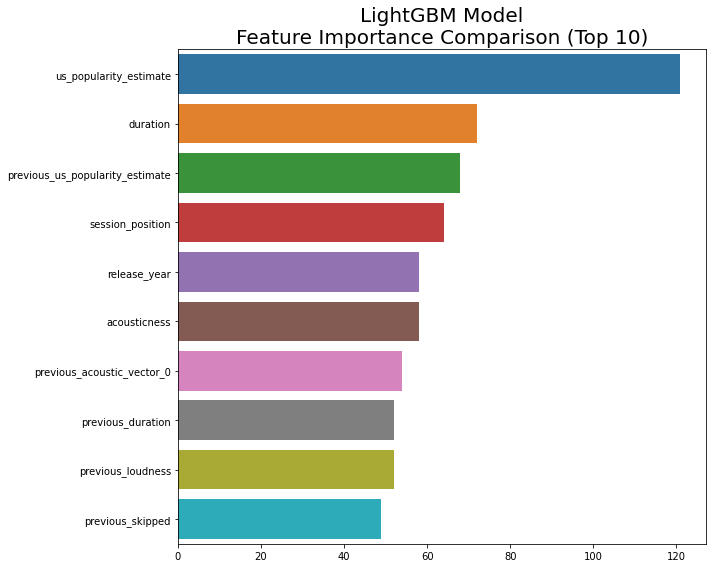

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fi = pd.DataFrame(lgbm_feature_importances,columns=['Feature','Importance'])

plt.figure(figsize=(10,8))
sns.barplot(
    "Importance",
    "Feature",
    data=fi.head(10)
)
plt.title(
    "LightGBM Model\nFeature Importance Comparison (Top 10)",
    fontsize=20
)
plt.xlabel(
    "",
    fontsize=15
)
plt.ylabel(
    "",
    fontsize=15
)
# plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("lgbm_feature_importance_top10.png")
# plt.show()

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
print("Logistic Regression Confusion Matrix")
print(confusion_matrix(
    y_test,
    log.predict(X_test)
) / sum(y_test.shape))

Logistic Regression Confusion Matrix
[[0.04157732 0.44091017]
 [0.02701334 0.49049917]]


In [31]:
print("Random Forest Confusion Matrix")
print(confusion_matrix(
    y_test,
    rfc.predict(X_test)
) / sum(y_test.shape))

Random Forest Confusion Matrix
[[0.34328091 0.13920658]
 [0.1540386  0.36347391]]


In [32]:
print("XGBoost Confusion Matrix")
print(confusion_matrix(
    y_test,
    xgb.predict(X_test)
) / sum(y_test.shape))

XGBoost Confusion Matrix
[[0.36040624 0.12208125]
 [0.14954134 0.36797117]]


In [33]:
print("LightGBM Confusion Matrix")
print(confusion_matrix(
    y_test,
    lgbm.predict(X_test)
) / sum(y_test.shape))

LightGBM Confusion Matrix
[[0.35912557 0.12336193]
 [0.14849893 0.36901358]]


In [34]:
from sklearn.metrics import accuracy_score

def predict_proba(X):
    predictions = (
        log.predict_proba(scaler.transform(X))[:,1] +
        rfc.predict_proba(X)[:,1] +
        xgb.predict_proba(X)[:,1] +
        lgbm.predict_proba(X)[:,1]
    )
    return predictions / 4

def predict(X,threshold=0.5):
    return (predict_proba(X) > threshold).astype('float32')

def score(X,y):
    return accuracy_score(y,predict(X))

print("Ensemble Train Accuracy:  %.3f" % score(X_train,y_train))
print("Ensemble Val Accuracy:    %.3f" % score(X_val,y_val))
print("Ensemble Test Accuracy:   %.3f" % score(X_test,y_test))

Ensemble Train Accuracy:  0.867
Ensemble Val Accuracy:    0.724
Ensemble Test Accuracy:   0.725


In [35]:
ensamble_predictions = predict(X_test)

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [37]:
lgbm_preds = lgbm.predict(X_test)

print("LightGBM Test Precision Score: %.3f" % precision_score(y_test,lgbm_preds))
print("LightGBM Test Recall Score:    %.3f" % recall_score(y_test,lgbm_preds))
print("LightGBM Test F1 Score:        %.3f" % f1_score(y_test,lgbm_preds))

LightGBM Test Precision Score: 0.749
LightGBM Test Recall Score:    0.713
LightGBM Test F1 Score:        0.731


In [38]:
print("Ensemble Test Precision Score: %.3f" % precision_score(y_test,ensamble_predictions))
print("Ensemble Test Recall Score:    %.3f" % recall_score(y_test,ensamble_predictions))
print("Ensemble Test F1 Score:        %.3f" % f1_score(y_test,ensamble_predictions))

Ensemble Test Precision Score: 0.744
Ensemble Test Recall Score:    0.714
Ensemble Test F1 Score:        0.728


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


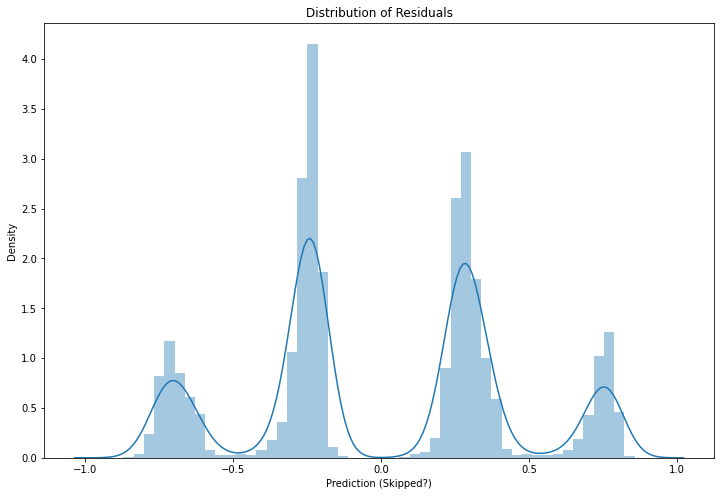

In [39]:
lgbm_probs = lgbm.predict_proba(X_test)[:,1]
lgmb_residuals = (lgbm_probs - y_test).sort_values()

plt.figure(figsize=(12,8))
sns.distplot(lgmb_residuals)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction (Skipped?)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


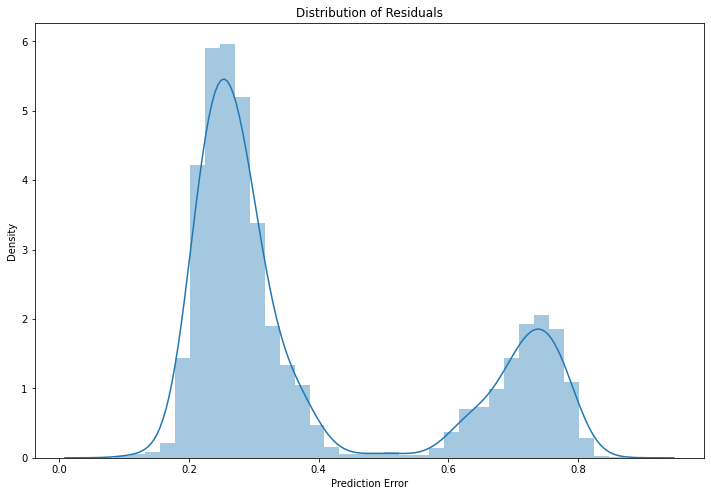

In [40]:
plt.figure(figsize=(12,8))
sns.distplot(np.abs(lgmb_residuals))
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
#grid(color='r', linestyle='-', linewidth=2)
plt.show()


In [41]:
threshold = 0.6
print("Proportion of Residuals (Greater than %.2f):  %.4f" % (
    threshold,
    (np.abs(lgmb_residuals) > threshold).sum() / lgmb_residuals.count()
))


Proportion of Residuals (Greater than 0.60):  0.2633


In [42]:
target_residuals = np.abs(lgmb_residuals) > threshold
target_residuals = target_residuals.sort_index()
print (target_residuals)

5         False
9         False
14         True
15        False
21        False
          ...  
167850    False
167853    False
167863    False
167871    False
167873     True
Name: skipped, Length: 33576, dtype: bool


In [43]:
X_test.sort_index().head()

,session_position,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,previous_session_position,previous_skipped,previous_duration,previous_release_year,previous_us_popularity_estimate,previous_acousticness,previous_beat_strength,previous_bounciness,previous_danceability,previous_dyn_range_mean,previous_energy,previous_flatness,previous_instrumentalness,previous_key,previous_liveness,previous_loudness,previous_mechanism,previous_mode,previous_organism,previous_speechiness,previous_tempo,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
5,6,216.689484,2018.0,99.997604,0.098337,0.548632,0.658323,0.596480,10.416269,0.557129,1.027320,7.479557e-08,1.0,0.056493,-7.522,0.385027,0.0,0.440376,0.133586,133.246994,5.0,0.661081,-0.817504,0.283297,0.387589,0.279636,-0.280334,0.117993,0.106159,0.311233,5.0,0.0,210.545258,2018.0,99.998497,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8.0,0.120842,-4.919,0.759465,1.0,0.170148,0.240980,147.031006,4.0,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315
9,10,60.000000,2018.0,99.957436,0.332467,0.751500,0.843354,0.914082,14.457762,0.239318,1.040802,4.132156e-04,4.0,0.119036,-8.597,0.622222,0.0,0.355844,0.154609,100.237000,4.0,0.257672,-0.647221,0.316101,0.251329,-0.041532,-0.252359,0.059971,-0.313696,0.126421,9.0,1.0,218.260818,2018.0,99.998451,0.030127,0.818798,0.879947,0.964383,15.037571,0.555280,1.046868,5.667919e-04,5.0,0.128244,-6.245,0.857855,0.0,0.102744,0.049853,130.016998,4.0,0.338321,-0.744412,0.308700,0.230126,0.066493,-0.242549,0.025370,-0.403210,0.159350
14,15,228.661804,2018.0,99.971413,0.774773,0.617454,0.670036,0.823040,9.958458,0.447236,1.022653,1.483840e-05,1.0,0.093145,-10.562,0.673130,0.0,0.594608,0.125605,110.058998,4.0,0.413239,-0.797031,0.424720,0.342543,-0.023328,-0.315267,0.107823,-0.384532,0.181089,14.0,0.0,234.589294,2018.0,99.998947,0.058140,0.678129,0.730079,0.762655,10.812087,0.441125,1.031085,2.466994e-09,0.0,0.045777,-8.211,0.462094,1.0,0.382572,0.256456,86.093002,4.0,0.538387,-0.858347,0.317665,0.326257,0.103337,-0.287205,0.031015,-0.448952,0.202570
15,16,177.338776,2018.0,99.990738,0.205823,0.601301,0.689148,0.648763,10.634233,0.557770,1.011848,1.051750e-06,4.0,0.156104,-5.675,0.211957,0.0,0.575923,0.424763,75.086998,4.0,0.150389,-0.815604,0.428640,0.333781,0.005816,-0.396930,0.048073,-0.344478,0.151020,15.0,1.0,228.661804,2018.0,99.971413,0.774773,0.617454,0.670036,0.823040,9.958458,0.447236,1.022653,1.483840e-05,1.0,0.093145,-10.562,0.673130,0.0,0.594608,0.125605,110.058998,4.0,0.413239,-0.797031,0.424720,0.342543,-0.023328,-0.315267,0.107823,-0.384532,0.181089
21,2,320.933319,1974.0,99.508057,0.000017,0.291298,0.251156,0.303636,5.012511,0.973996,0.919151,7.752319e-01,2.0,0.892332,-4.874,0.282387,1.0,0.507429,0.068105,145.908997,4.0,0.555482,0.203349,0.247835,-0.136071,-0.440866,0.680082,0.181352,-0.279335,0.001125,1.0,1.0,328.733337,1993.0,98.808350,0.000027,0.183969,0.150195,0.215750,4.110182,0.972788,0.873141,4.730427e-01,6.0,0.948256,-7.137,0.147632,1.0,0.602715,0.192012,74.579002,4.0,0.237204,0.185752,0.275915,-0.242243,-0.384358,0.580225,0.107189,-0.256305,0.222407


In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33576 entries, 159336 to 18534
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   session_position                 33576 non-null  int64  
 1   duration                         33576 non-null  float32
 2   release_year                     33576 non-null  float32
 3   us_popularity_estimate           33576 non-null  float32
 4   acousticness                     33576 non-null  float32
 5   beat_strength                    33576 non-null  float32
 6   bounciness                       33576 non-null  float32
 7   danceability                     33576 non-null  float32
 8   dyn_range_mean                   33576 non-null  float32
 9   energy                           33576 non-null  float32
 10  flatness                         33576 non-null  float32
 11  instrumentalness                 33576 non-null  float32
 12  key          

In [45]:
columns_to_compare, _ = zip(*sorted(zip(X.columns, lgbm.feature_importances_),key=lambda p:p[1],reverse=True))
columns_to_compare[:10]

('us_popularity_estimate',
 'duration',
 'previous_us_popularity_estimate',
 'session_position',
 'release_year',
 'acousticness',
 'previous_acoustic_vector_0',
 'previous_duration',
 'previous_loudness',
 'previous_skipped')

In [46]:
def plot(column):
    plt.figure(figsize=(8,4))
    sns.distplot(
        X_test[column][target_residuals],
        label="Residual > 0.6"
    )
    sns.distplot(
        X_test[column][~target_residuals],
        label="Residual < 0.6"
    )
    plt.title(f"Distribution of \"{column}\"\nw/ Residual Split")
    plt.show()
    return

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


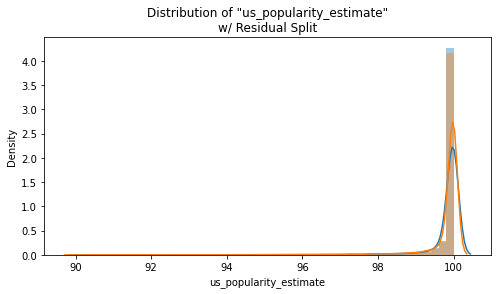

In [47]:
plot("us_popularity_estimate")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


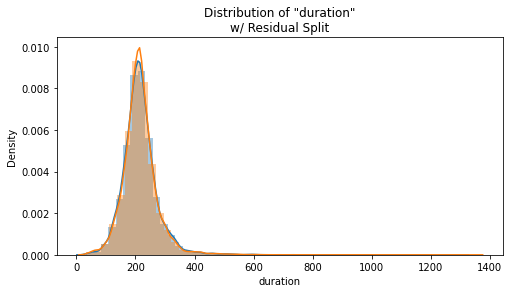

In [48]:
plot("duration")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


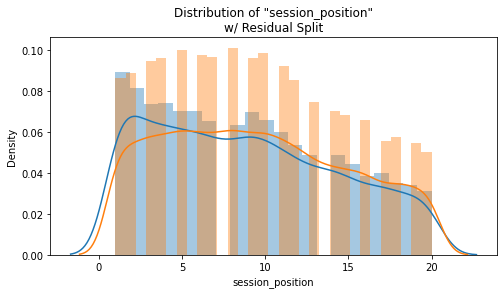

In [49]:
plot("session_position")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


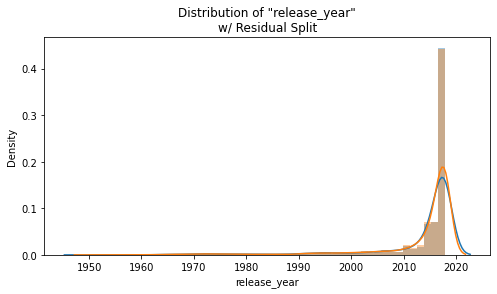

In [50]:
plot("release_year")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


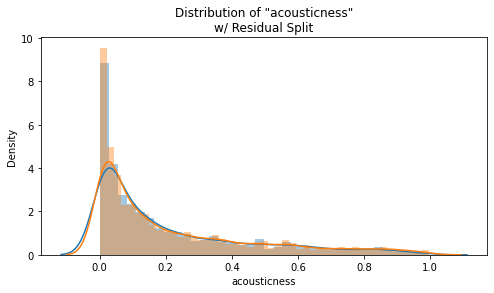

In [51]:
plot("acousticness")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


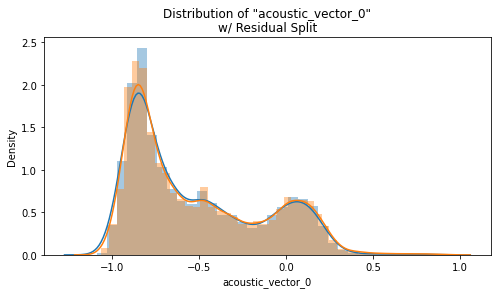

In [52]:
plot("acoustic_vector_0")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


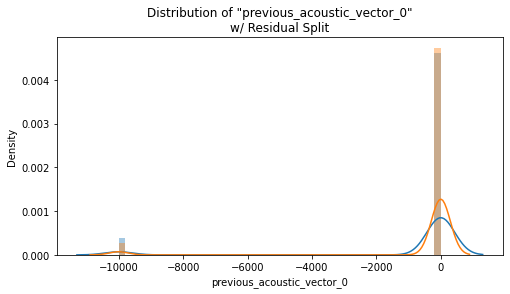

In [53]:
plot("previous_acoustic_vector_0")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


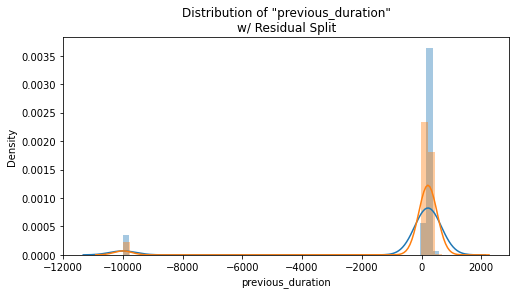

In [54]:
plot("previous_duration")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


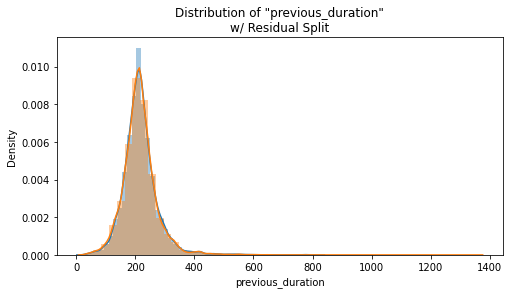

In [55]:

# The N/A value is making it hard to see the main distribution

plt.figure(figsize=(8,4))
sns.distplot(
    X_test["previous_duration"][target_residuals & (X_test["previous_duration"] > -2000)],
    label="Residual > 0.6"
)
sns.distplot(
    X_test["previous_duration"][~target_residuals & (X_test["previous_duration"] > -2000)],
    label="Residual < 0.6"
)
plt.title(f"Distribution of \"{ 'previous_duration' }\"\nw/ Residual Split")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


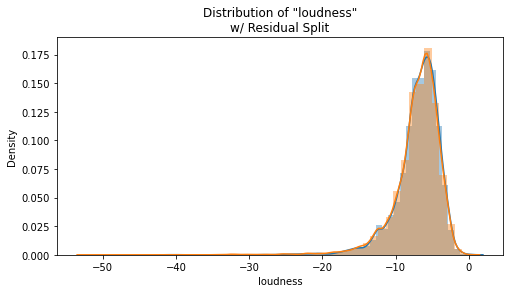

In [56]:
plot("loudness")

In [57]:
full_session_data.head()

,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,previous_session_position,previous_skipped,previous_duration,previous_release_year,previous_us_popularity_estimate,previous_acousticness,previous_beat_strength,previous_bounciness,previous_danceability,previous_dyn_range_mean,previous_energy,previous_flatness,previous_instrumentalness,previous_key,previous_liveness,previous_loudness,previous_mechanism,previous_mode,previous_organism,previous_speechiness,previous_tempo,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1.0,0.678553,-6.577,0.546784,1.0,0.320668,0.069717,134.024994,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7.0,0.104322,-5.319,0.824766,0.0,0.131391,0.061158,130.037994,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,1.0,0.0,180.066666,2018.0,99.968132,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1.0,0.678553,-6.577,0.546784,1.0,0.320668,0.069717,134.024994,4.0,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10.0,0.135776,-5.843,0.774327,1.0,0.296923,0.045354,145.028000,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,2.0,0.0,236.796371,2018.0,99.896729,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7.0,0.104322,-5.319,0.824766,0.0,0.131391,0.061158,130.037994,4.0,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1.0,0.103722,-7.756,0.630996,1.0,0.603271,0.229936,111.982002,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,3.0,0.0,231.266663,2018.0,99.999977,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10.0,0.135776,-5.843,0.774327,1.0,0.296923,0.045354,145.028000,4.0,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,210.545258,2018.0,99.998497,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8.0,0.120842,-4.919,0.759465,1.0,0.170148,0.240980,147.031006,4.0,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,4.0,0.0,169.826675,2018.0,99.995041,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1.0,0.103722,-7.756,0.630996,1.0,0.603271,0.229936,111.982002,4.0,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603


In [58]:
session_ids = full_session_data.session_id.unique()
session_ids.shape


(10000,)

In [59]:
rid = np.random.choice(session_ids)
rid

'0_05045ad4-3958-45a4-b56f-da684e2848c6'

In [60]:
session = full_session_data[full_session_data.session_id == rid]
session

,session_id,session_position,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,previous_session_position,previous_skipped,previous_duration,previous_release_year,previous_us_popularity_estimate,previous_acousticness,previous_beat_strength,previous_bounciness,previous_danceability,previous_dyn_range_mean,previous_energy,previous_flatness,previous_instrumentalness,previous_key,previous_liveness,previous_loudness,previous_mechanism,previous_mode,previous_organism,previous_speechiness,previous_tempo,previous_time_signature,previous_valence,previous_acoustic_vector_0,previous_acoustic_vector_1,previous_acoustic_vector_2,previous_acoustic_vector_3,previous_acoustic_vector_4,previous_acoustic_vector_5,previous_acoustic_vector_6,previous_acoustic_vector_7
58812,0_05045ad4-3958-45a4-b56f-da684e2848c6,1,1,t_a779ac10-6a41-45f0-b87e-27b814ae7da2,198.014297,2011.0,99.918221,0.000604,0.483430,0.531844,0.497420,8.339815,0.551942,1.025953,7.413753e-06,6.0,0.106373,-6.158,0.262295,1.0,0.521636,0.240282,87.495003,4.0,0.357667,-0.708740,0.183329,0.180253,0.153673,-0.298979,-0.028958,-0.417443,0.180376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58813,0_05045ad4-3958-45a4-b56f-da684e2848c6,2,1,t_e48d4a12-13c7-4a63-8035-032c82bf0b76,173.000000,2017.0,99.765274,0.022328,0.591506,0.702733,0.737189,11.138469,0.419157,1.013658,5.088399e-08,4.0,0.118569,-12.753,0.740831,0.0,0.183939,0.444872,170.014999,4.0,0.560864,-0.930760,0.328282,0.222064,0.100098,-0.343206,-0.059057,-0.633440,0.182149,1.0,1.0,198.014297,2011.0,99.918221,0.000604,0.483430,0.531844,0.497420,8.339815,0.551942,1.025953,7.413753e-06,6.0,0.106373,-6.158,0.262295,1.0,0.521636,0.240282,87.495003,4.0,0.357667,-0.708740,0.183329,0.180253,0.153673,-0.298979,-0.028958,-0.417443,0.180376
58814,0_05045ad4-3958-45a4-b56f-da684e2848c6,3,0,t_992559c4-20c3-4dd9-b131-96800cbaf488,289.358368,2018.0,99.959724,0.442221,0.469721,0.600253,0.547573,9.807496,0.584749,1.011674,4.666140e-13,5.0,0.135521,-6.262,0.407692,0.0,0.522679,0.165579,180.156998,4.0,0.685587,-0.915588,0.392687,0.276380,0.084746,-0.327828,0.043732,-0.470652,0.174287,2.0,1.0,173.000000,2017.0,99.765274,0.022328,0.591506,0.702733,0.737189,11.138469,0.419157,1.013658,5.088399e-08,4.0,0.118569,-12.753,0.740831,0.0,0.183939,0.444872,170.014999,4.0,0.560864,-0.930760,0.328282,0.222064,0.100098,-0.343206,-0.059057,-0.633440,0.182149
58815,0_05045ad4-3958-45a4-b56f-da684e2848c6,4,1,t_33b2e639-81a3-477c-8413-bda8133ab9b0,214.378006,2011.0,99.660210,0.001343,0.466903,0.519667,0.685083,8.253042,0.899514,0.971749,1.678401e-08,1.0,0.229961,-4.317,0.676674,1.0,0.228628,0.281042,141.981995,4.0,0.667460,-0.857220,0.295616,0.205337,0.117558,-0.303892,-0.027926,-0.517208,0.170094,3.0,0.0,289.358368,2018.0,99.959724,0.442221,0.469721,0.600253,0.547573,9.807496,0.584749,1.011674,4.666140e-13,5.0,0.135521,-6.262,0.407692,0.0,0.522679,0.165579,180.156998,4.0,0.685587,-0.915588,0.392687,0.276380,0.084746,-0.327828,0.043732,-0.470652,0.174287
58816,0_05045ad4-3958-45a4-b56f-da684e2848c6,5,1,t_e33b6679-49db-4d75-879d-117817276788,282.253326,2015.0,99.949097,0.185473,0.574073,0.609632,0.704353,9.048797,0.431264,1.054297,9.724116e-02,8.0,0.248980,-7.893,0.653910,1.0,0.277649,0.131151,146.003006,4.0,0.345696,-0.775573,0.233430,0.191646,0.133997,-0.255447,-0.033480,-0.483167,0.133567,4.0,1.0,214.378006,2011.0,99.660210,0.001343,0.466903,0.519667,0.685083,8.253042,0.899514,0.971749,1.678401e-08,1.0,0.229961,-4.317,0.676674,1.0,0.228628,0.281042,141.981995,4.0,0.667460,-0.857220,0.295616,0.205337,0.117558,-0.303892,-0.027926,-0.517208,0.170094
58817,0_0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


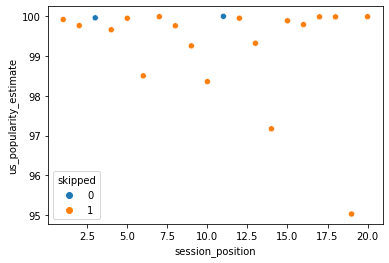

In [61]:
sns.scatterplot(
    session.session_position,
    session.us_popularity_estimate,
    hue=session.skipped
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


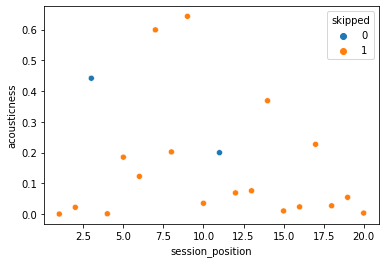

In [62]:
sns.scatterplot(
    session.session_position,
    session.acousticness,
    hue=session.skipped
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


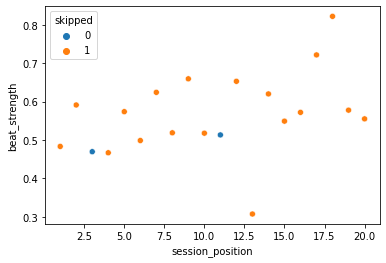

In [63]:
sns.scatterplot(
    session.session_position,
    session.beat_strength,
    hue=session.skipped
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


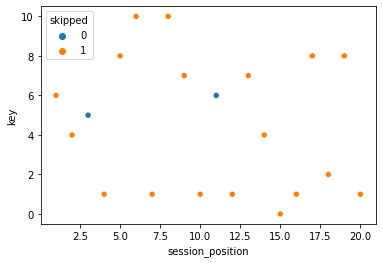

In [64]:
sns.scatterplot(
    session.session_position,
    session.key,
    hue=session.skipped
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


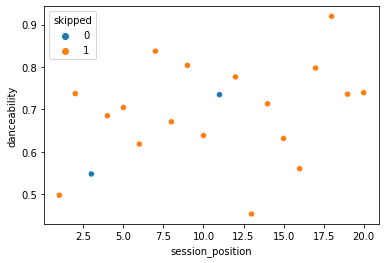

In [65]:
sns.scatterplot(
    session.session_position,
    session.danceability,
    hue=session.skipped
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


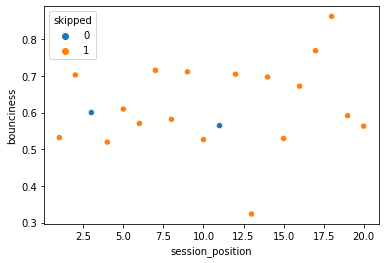

In [66]:
sns.scatterplot(
    session.session_position,
    session.bounciness,
    hue=session.skipped
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


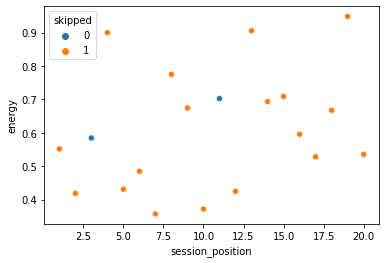

In [67]:

sns.scatterplot(
    session.session_position,
    session.energy,
    hue=session.skipped
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


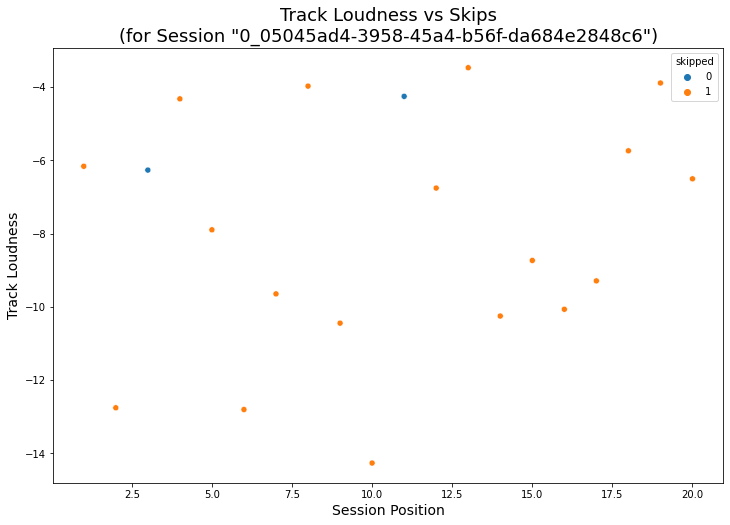

In [68]:

plt.figure(figsize=(12,8))
sns.scatterplot(
    session.session_position,
    session.loudness,
    hue=session.skipped
)
plt.title(
    f"Track Loudness vs Skips\n(for Session \"{rid}\")",
    fontsize=18
)
plt.xlabel(
    "Session Position",
    fontsize=14
)
plt.ylabel(
    "Track Loudness",
    fontsize=14
)
# plt.savefig(f"images/session_eda/session_{rid}_loudness.png")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


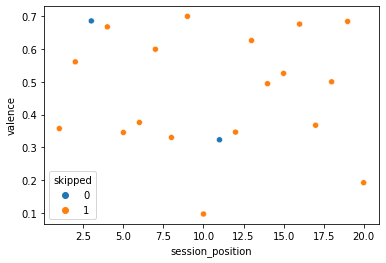

In [69]:
sns.scatterplot(
    session.session_position,
    session.valence,
    hue=session.skipped
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


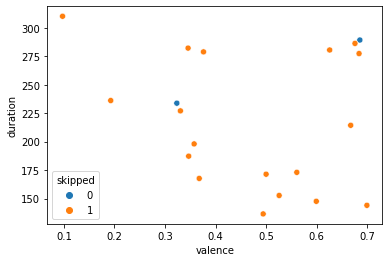

In [70]:
sns.scatterplot(
    session.valence,
    session.duration,
    hue=session.skipped
)

In [71]:
full_session_data.skipped.sum() / full_session_data.skipped.count()

0.5171789373361925

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


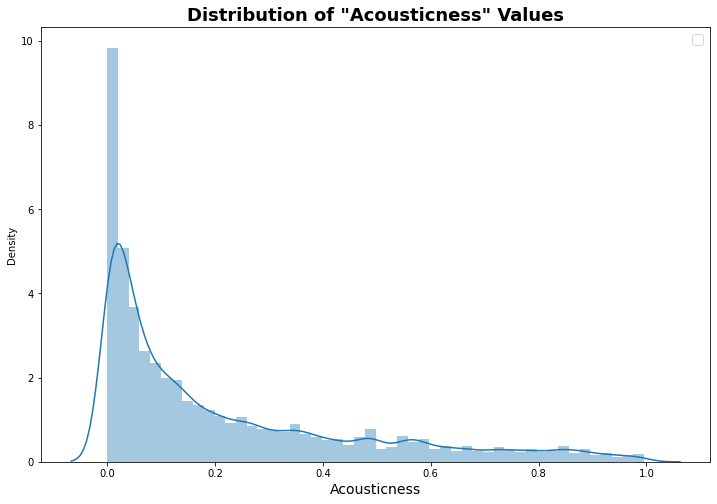

In [72]:
plt.figure(figsize=(12,8))
sns.distplot(
    full_session_data.acousticness
)
plt.title(
    "Distribution of \"Acousticness\" Values",
    fontweight='bold',
    fontsize=18
)

# plt.vlines(
#     0.48,
#     0,
#     10,
#     label="Willie Nelson's \"Highwayman\"",
#     colors='orange',
#     linestyles='dashed'
# )
# plt.vlines(
#     0.032,
#     0,
#     10,
#     label="Wu-Tang Clan's \"Protect Ya Neck\"",
#     colors='green',
#     linestyles='dashed'
# )
# plt.vlines(
#     0.732,
#     0,
#     10,
#     label="John Coltrane's \"Blue World\"",
#     colors='blue',
#     linestyles='dashed'
# )
plt.legend(
    fontsize=14
)
plt.xlabel(
    "Acousticness",
    fontsize=14
)
#plt.savefig("images/feature_eda/acousticness_distribution.png")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


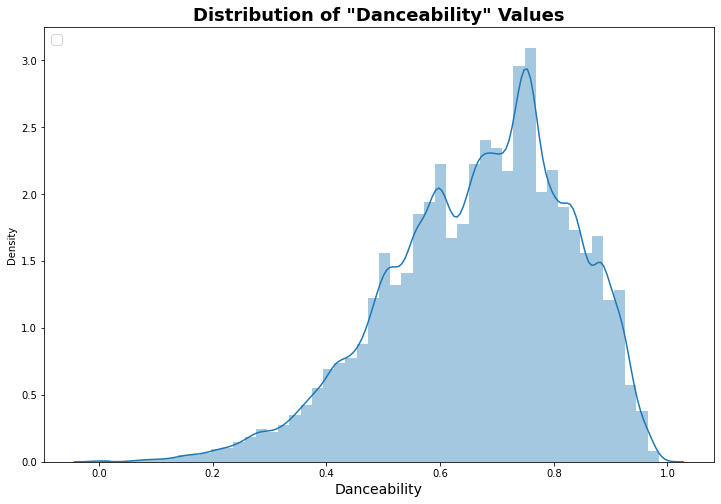

In [73]:
plt.figure(figsize=(12,8))
sns.distplot(
    full_session_data.danceability
)
plt.title(
    "Distribution of \"Danceability\" Values",
    fontweight='bold',
    fontsize=18
)

# plt.vlines(
#     0.67,
#     0,
#     4,
#     label="Willie Nelson's \"Highwayman\"",
#     colors='orange',
#     linestyles='dashed'
# )
# plt.vlines(
#     0.81,
#     0,
#     4,
#     label="Wu-Tang Clan's \"Protect Ya Neck\"",
#     colors='green',
#     linestyles='dashed'
# )
# plt.vlines(
#     0.477,
#     0,
#     4,
#     label="John Coltrane's \"Blue World\"",
#     colors='blue',
#     linestyles='dashed'
# )
plt.legend(
    fontsize=14,
    loc=2
)
plt.xlabel(
    "Danceability",
    fontsize=14
)
#plt.savefig("images/feature_eda/danceability_distribution.png")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


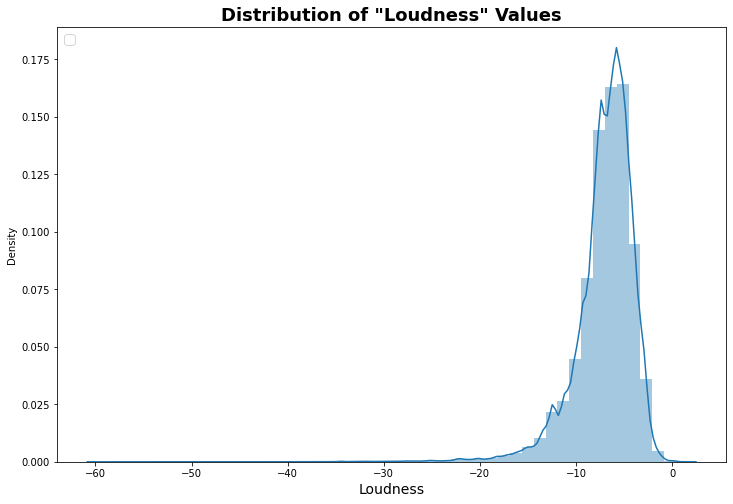

In [74]:
plt.figure(figsize=(12,8))
sns.distplot(
    full_session_data.loudness
)
plt.title(
    "Distribution of \"Loudness\" Values",
    fontweight='bold',
    fontsize=18
)

# plt.vlines(
#     -16.842,
#     0,
#     0.2,
#     label="Willie Nelson's \"Highwayman\"",
#     colors='orange',
#     linestyles='dashed'
# )
# plt.vlines(
#     -10.8,
#     0,
#     0.2,
#     label="Wu-Tang Clan's \"Protect Ya Neck\"",
#     colors='green',
#     linestyles='dashed'
# )
# plt.vlines(
#     -8.301,
#     0,
#     0.2,
#     label="John Coltrane's \"Blue World\"",
#     colors='blue',
#     linestyles='dashed'
# )
plt.legend(
    fontsize=14,
    loc=2
)
plt.xlabel(
    "Loudness",
    fontsize=14
)
#plt.savefig("images/feature_eda/loudness_distribution.png")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


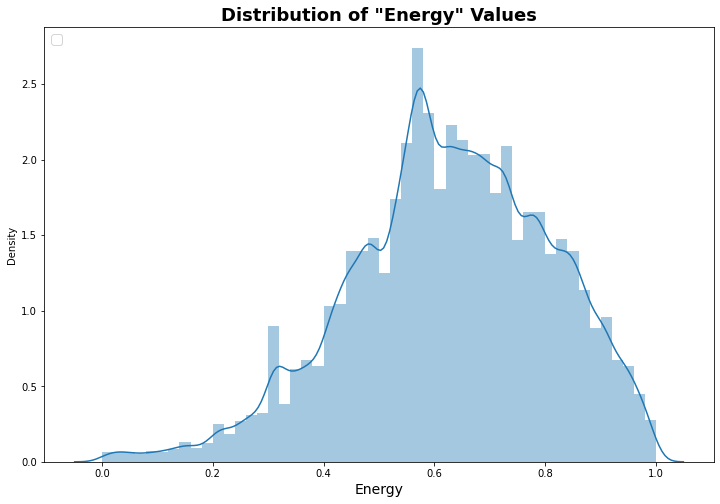

In [75]:
plt.figure(figsize=(12,8))
sns.distplot(
    full_session_data.energy
)
plt.title(
    "Distribution of \"Energy\" Values",
    fontweight='bold',
    fontsize=18
)

# plt.vlines(
#     0.351,
#     0,
#     3,
#     label="Willie Nelson's \"Highwayman\"",
#     colors='orange',
#     linestyles='dashed'
# )
# plt.vlines(
#     0.552,
#     0,
#     3,
#     label="Wu-Tang Clan's \"Protect Ya Neck\"",
#     colors='green',
#     linestyles='dashed'
# )
# plt.vlines(
#     0.733,
#     0,
#     3,
#     label="John Coltrane's \"Blue World\"",
#     colors='blue',
#     linestyles='dashed'
# )
plt.legend(
    fontsize=14,
    loc=2
)
plt.xlabel(
    "Energy",
    fontsize=14
)
#plt.savefig("images/feature_eda/energy_distribution.png")
plt.show()

In [76]:
log_probs = log.predict_proba(scaler.transform(X_test))[:,1]
lgb_probs = lgbm.predict_proba(X_test)[:,1]


In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

In [78]:
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)
auc=roc_auc_score(y_test,lgb_probs)
print("AUC: %.3f" %auc)

AUC: 0.755


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


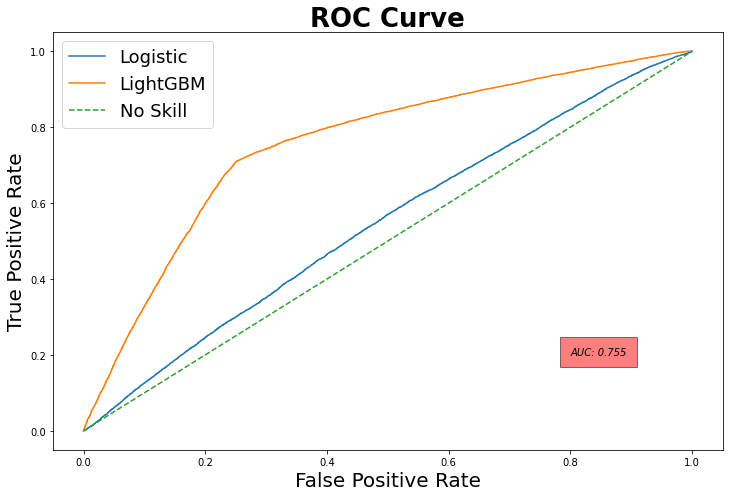

In [107]:
fig = plt.figure(figsize=(12,8))
plt.plot(
    log_fpr,
    log_tpr,
    label="Logistic"
    
)
plt.plot(
    lgb_fpr,
    lgb_tpr,
    label="LightGBM"
)
plt.plot(
    np.linspace(0,1,10),
    np.linspace(0,1,10),
    label="No Skill",
    linestyle="dashed"

)
plt.legend(
    fontsize=18
)
plt.title(
    "ROC Curve",
    fontsize=26,
    fontweight='bold'
)
plt.xlabel(
    "False Positive Rate",
    fontsize=20
)
plt.ylabel(
    "True Positive Rate",
    fontsize=20
)

ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)
ax.text(0.8, 0.2,"AUC: %.3f" %auc, style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
#plt.savefig("images/roc_curve.png")
plt.show()

